In [42]:
from pandas import read_csv
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier #function we used to train
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

# This dataset is used to predict whether pregnant women have gestational diabetes or not.

We have several parameters, such as the number of times the woman has been pregnant, blood pressure measurements, BMI, serum glucose level, age, and similar factors.

Now, we consider a few of these parameters.
Using these selected parameters,
we aim to train a model
that can determine whether a person is likely to have gestational diabetes based on the given data.



In [43]:
data_frame=read_csv('data.csv')


In [44]:
data_frame.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0



# Splitting the Dataset into Input and Output

Before splitting the dataset, we first convert the DataFrame into a numerical structure using .values. This ensures that the data is properly formatted before further processing.

We use **slicing** to separate the dataset into input (features) and output (labels).

The first 8 columns represent the input features.

The 9th column (last column) represents the output labels.



**INPUT**

```
# data= dataset[:,0:8].astype(float)

```

Here, we select columns from index 0 to 8 (excluding 8) as input.

The first column index is kept empty (:) to ensure we include all rows.

We use .astype(float) to convert the values to floating-point numbers, ensuring precision.

If we don’t specify the data type as float, Python might treat it as int, leading to rounding errors.


**OUTPUT**



```
# labels= dataset[:,8]

```
We select all rows (:) but only the 9th column (index 8), which represents the output labels.

Since there's only one output column, slicing isn't necessary here.


so with this im just printing the data set in to input and out put













In [45]:
dataset= data_frame.values
data= dataset[:,0:8].astype(float)
labels= dataset[:,8]
# print(data)
# print(labels)




In [46]:
input=np.array(data)
output=np.array(labels)

SPLIT DATA to traing sets and testing sets

In [47]:
#split data
(trainData,testData,trainLabel,testLabel)= train_test_split(input,output,test_size=0.25,random_state=42)

# Model Building


---


```

model = DecisionTreeClassifier(random_state=42,criterion='gini',max_features=2, max_depth = 15)
```

**This line initializes a Decision Tree Classifier with specific parameters to control its behavior**



---


2. **criterion='gini'**

>Defines how the model measures impurity when splitting nodes.

>'gini' uses Gini Impurity as the splitting criterion.

>Alternative:

>'entropy' → Uses Information Gain based on entropy.


---


**3.max_features=2**

>Limits the number of features considered for each split to 2.

>Helps prevent overfitting by ensuring the model doesn’t use all features at once.

>Possible values:
  None (default) → Uses all features.

  Integer (k) → Uses exactly k features per split.

  'auto' or 'sqrt' → Uses √n_features.

  'log2' → Uses log2(n_features).


---



**4. max_depth=15**

>Limits the depth of the tree to 15 levels.

>Prevents overfitting by restricting the complexity of the tree.

>If not specified, the tree grows until all leaves are pure (which may lead to overfitting).


---

1.**random_state=42**
>Ensures reproducibility by setting a fixed seed.

>If you run the code multiple times, the results will remain the same.

>42 is an arbitrary choice; any number can be used.


---

**Summary**
This model will:
✔ Use Gini impurity to split nodes.

✔ Consider only 2 features at each split.

✔ Grow the tree to a maximum depth of 15.

✔ Ensure reproducibility with random_state=42.



In [48]:
#splitter = best, random | max_features = int, auto, log, none | max_depth = int
model = DecisionTreeClassifier(random_state=42,criterion='gini',max_features=2, max_depth = 15)


```
# model.fit(trainData, trainLabel)

```


is used to train a Decision Tree Classifier using the training dataset

>It trains the DecisionTreeClassifier using the provided data (trainData) and labels (trainLabel).

>The model learns patterns from the training data.

>After training, the model can be used to make predictions on new data.

In [49]:
model.fit(trainData, trainLabel)

DecisionTreeClassifier(max_depth=15, max_features=2, random_state=42)

**score()**
It calculates the accuracy of the trained DecisionTreeClassifier.

Accuracy is computed as:

Accuracy =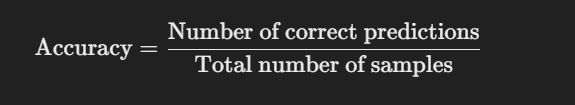




In [51]:
print(model.score(trainData, trainLabel))

0.9947826086956522


In [59]:
print(model.score(testData, testLabel))

0.671875


The **predict()** method uses the trained model to classify new (unseen) data points.

>It outputs an array of predicted class labels.

>**testData** → A 2D array containing the test samples (features).

>Shape: (num_samples, num_features)

In [55]:
predictions = model.predict(testData)

 **classification report to evaluate the performance of a trained Decision Tree**

classification_report()

---


It is a function from sklearn.metrics that provides detailed classification performance metrics.


It calculates and displays:
>Precision,Recall,F1-score,Support (number of true instances for each class)


---


required inputs:

testLabel → The actual class labels (ground truth).

predictions → The predicted class labels from the model.

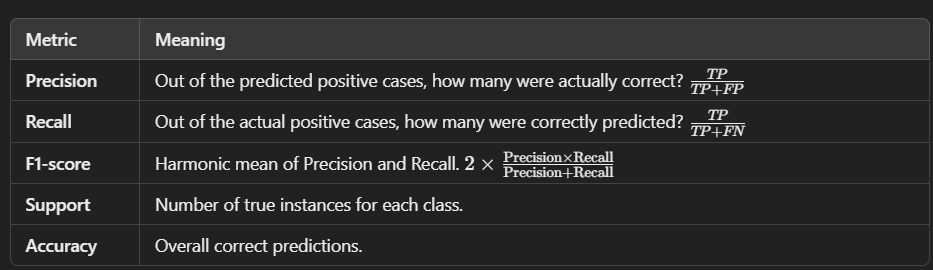

> A higher F1-score indicates better performance.

 >If Precision is high but Recall is low → Model is too conservative in predicting positives.

> If Recall is high but Precision is low → Model is over-predicting positives (more false positives).


---


Macro avg vs. Weighted avg:

>Macro avg: Average of metrics across all classes.

>Weighted avg: Weighted by the number of true samples in each class.


---

**When to Use classification_report()?**
>When evaluating imbalanced datasets (e.g., detecting rare diseases).

>When accuracy alone is not enough to assess performance.

In [56]:
print(classification_report(testLabel, predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       124
         1.0       0.54      0.51      0.53        68

    accuracy                           0.67       192
   macro avg       0.64      0.64      0.64       192
weighted avg       0.67      0.67      0.67       192



tree.plot_tree(model)
The given code is used to visualize a trained Decision Tree model

**tree.plot_tree(model)**  :   is used to visualize a trained Decision Tree model


---


tree.plot_tree(model) → Generates a visual representation of the trained Decision Tree.

figsize=(45,40) → Adjusts the figure size for better visibility (may be too large).

plt.show() → Displays the generated plot.


---

 **Expected Output**

>A graphical representation of the Decision Tree.

>Nodes represent splits based on feature values.

>Leaves represent final classifications.

>Colors indicate class dominance.


---

> Use max_depth to limit tree size, preventing a cluttered diagram.

 >Use feature_names to label the features properly.

> Use class_names to make the output more interpretable.

>If the tree is too complex, try pruning it.




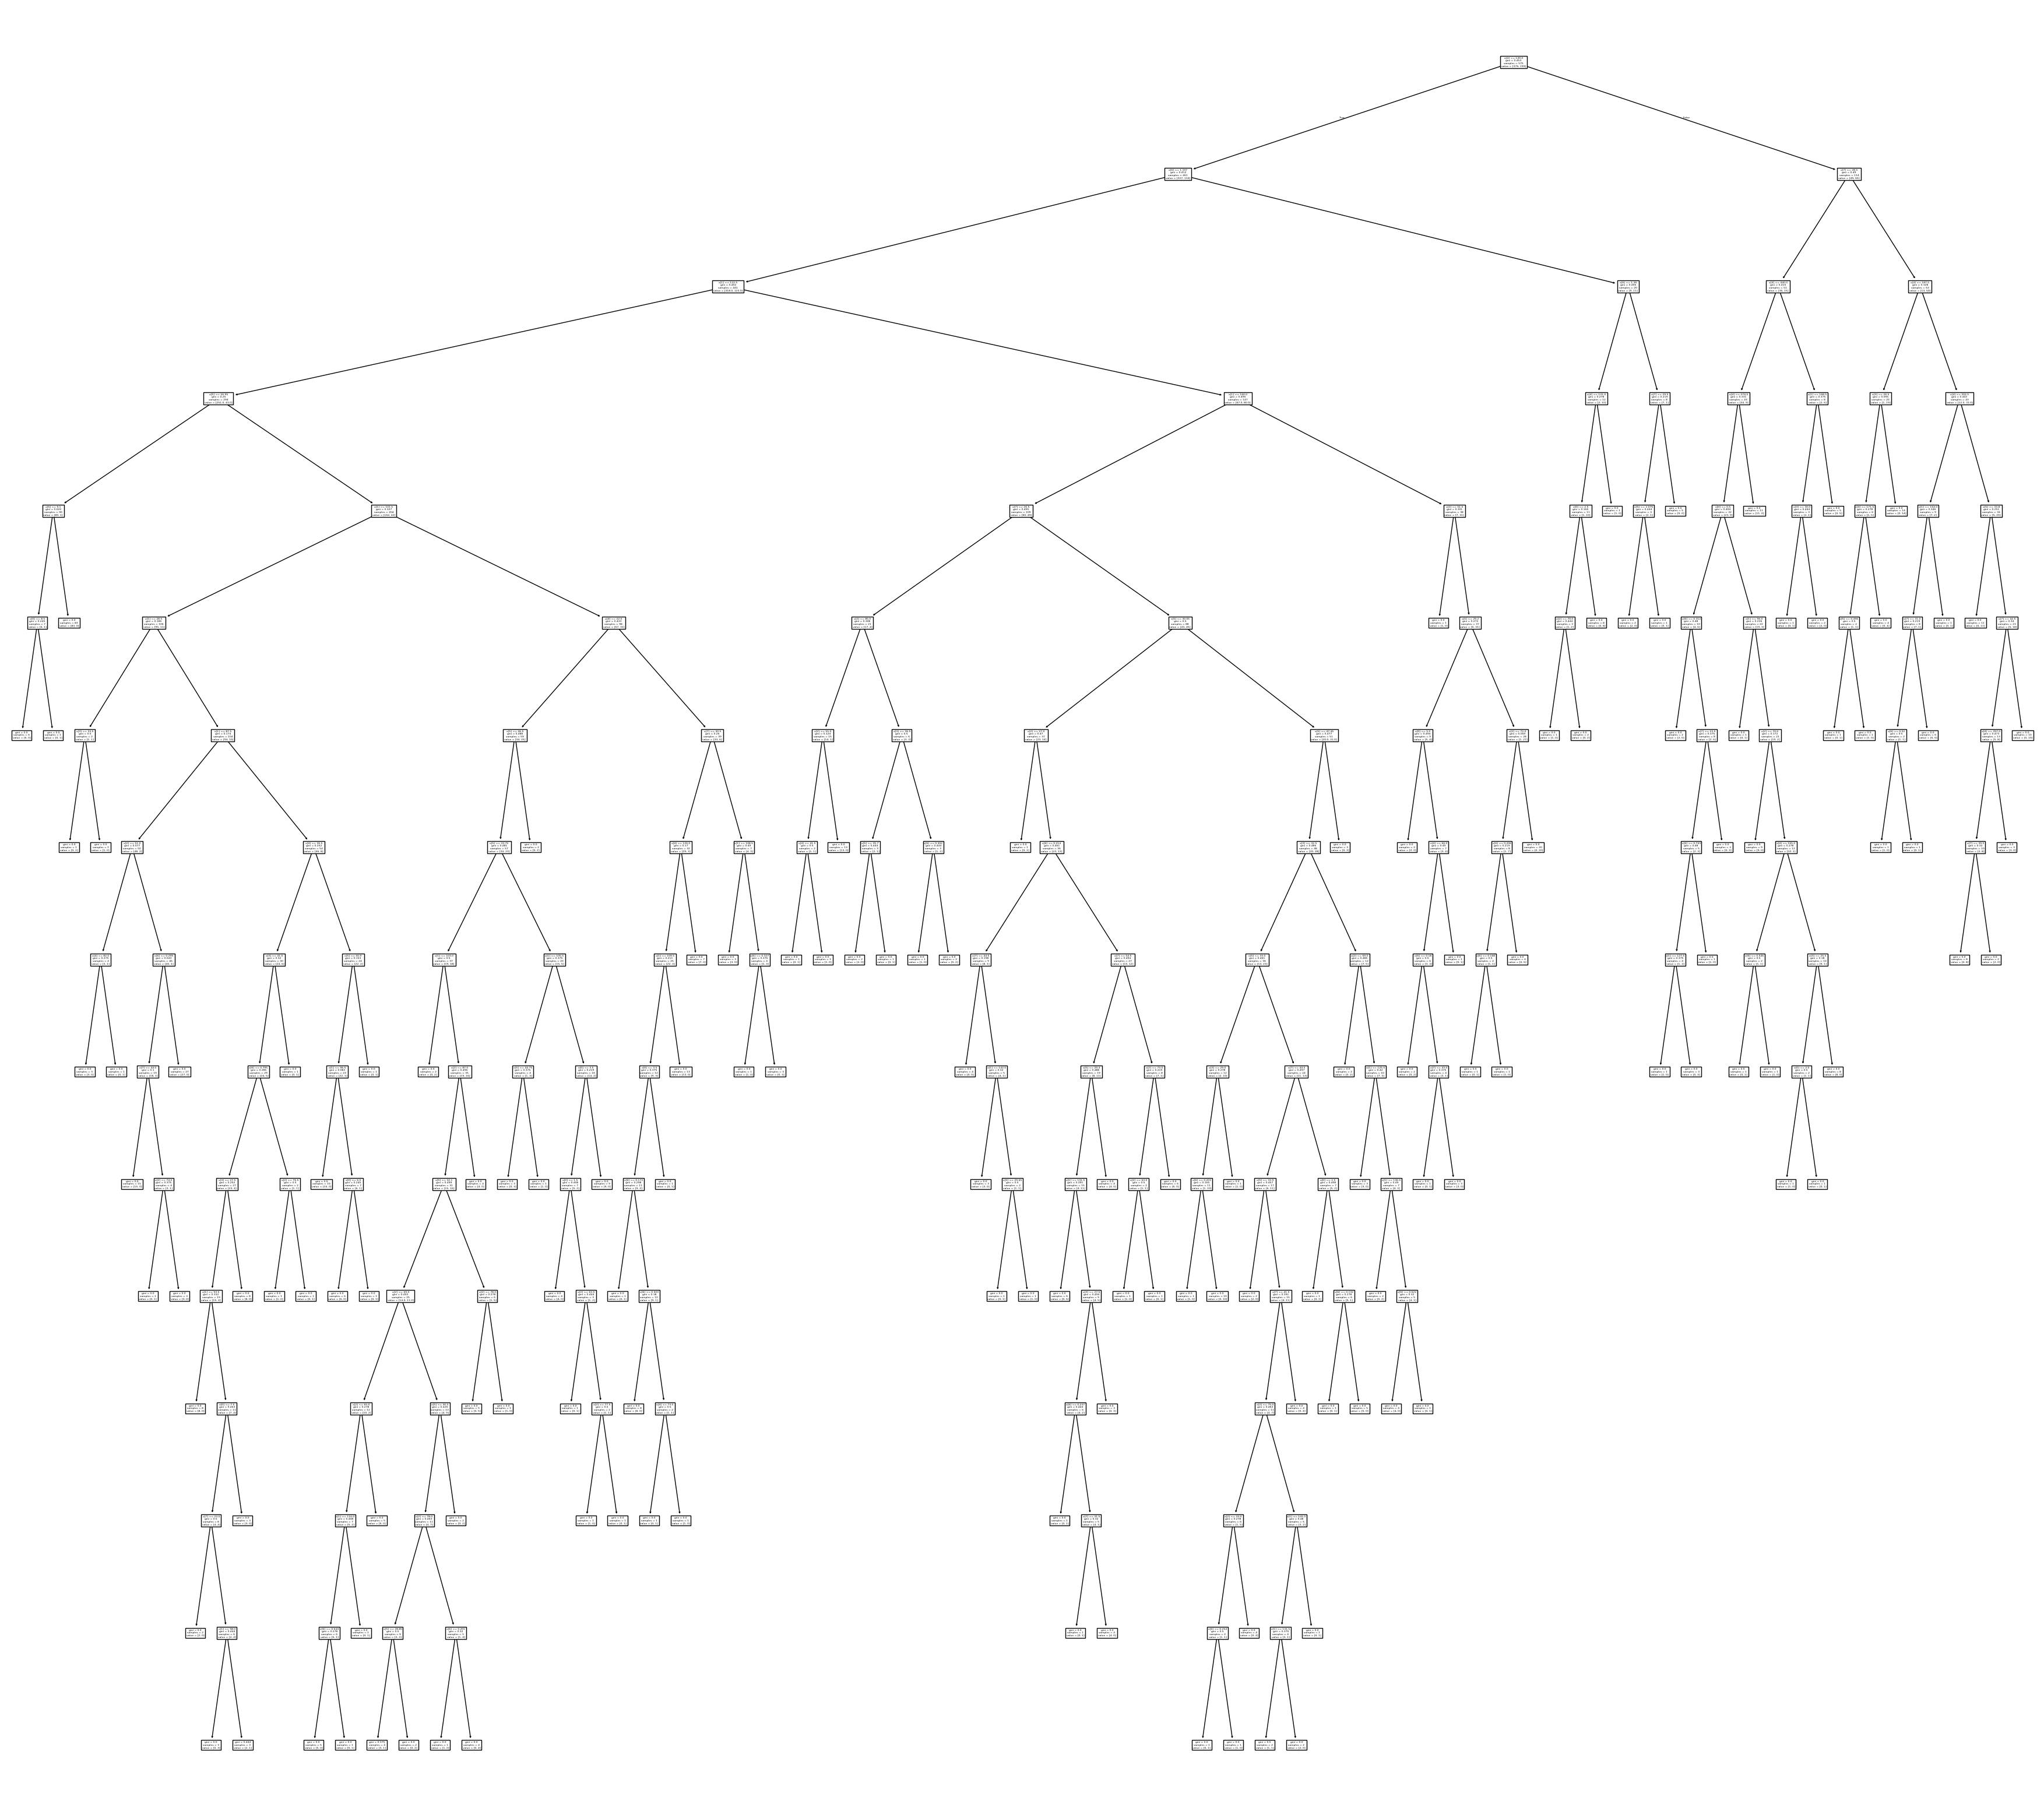

In [57]:
fig = plt.figure(figsize=(45,40))
fig = tree.plot_tree(model)
plt.show()

# Model building trial andd err for increse accuracy

In [62]:
model = DecisionTreeClassifier(random_state=42,criterion='gini',max_features=2, max_depth = 10)
model.fit(trainData, trainLabel)
print(model.score(testData, testLabel))

0.7864583333333334


In [63]:
model = DecisionTreeClassifier(random_state=42,criterion='gini',max_features=2, max_depth = 2)
model.fit(trainData, trainLabel)
print(model.score(testData, testLabel))

#0.6875 so not taking

0.6875


In [71]:
model = DecisionTreeClassifier(random_state=42,criterion='gini')
model.fit(trainData, trainLabel)
print(model.score(testData, testLabel))

0.75


In [80]:
model = DecisionTreeClassifier(random_state=1,criterion='gini', max_depth = 2)
model.fit(trainData, trainLabel)
print(model.score(testData, testLabel))

0.7447916666666666


#change gini imurity to entropy and try


In [82]:
#change gini imurity to entropy and try
model = DecisionTreeClassifier(random_state=42,criterion='entropy',max_features=2, max_depth = 10)
model.fit(trainData, trainLabel)
print(model.score(testData, testLabel))

0.7239583333333334


In [98]:
#change gini imurity to entropy and try
model = DecisionTreeClassifier(random_state=42,criterion='entropy',max_features=8, max_depth = 10000)
model.fit(trainData, trainLabel)
print(model.score(testData, testLabel))

0.7135416666666666


as of now more accurate value recived is  0.7864583333333334




In [99]:
model = DecisionTreeClassifier(random_state=42,criterion='gini',max_features=2, max_depth = 10)
model.fit(trainData, trainLabel)
print(model.score(testData, testLabel))

0.7864583333333334


# Overfitting vs. Underfitting

In machine learning, overfitting and underfitting are two common problems that affect model performance



---


**Overfitting**

The model learns too much from the training data, including noise and irrelevant patterns.

It performs extremely well on training data but poorly on new (test) data.


---

**Underfitting**

The model is too simple and cannot learn the patterns from the training data.

It performs poorly on both training and test data.




# SAVE TRAINED MODEL

In [100]:
import joblib

# Save the trained model to a file
joblib.dump(model, "decision_tree_model.pkl")

print("Model saved successfully!")

Model saved successfully!


 The model is saved as "decision_tree_model.pkl".

 We can reload it later without retraining.

 loaded_model can make predictions just like the original model.

In [101]:
# Load the saved model
loaded_model = joblib.load("decision_tree_model.pkl")

print("Model loaded successfully!")

Model loaded successfully!


In [103]:
#predictions = loaded_model.predict(testData)

#print("Predictions:", predictions)
print(loaded_model.score(testData, testLabel))

0.7864583333333334
